# Cluster


This notebook provides a comprehensive guide on implementing Cluster using scikit-learn libraries.

By: Bryce Li, NUS

## Density-Based Spatial Clustering Of Applications With Noise (DBSCAN)
Clusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 



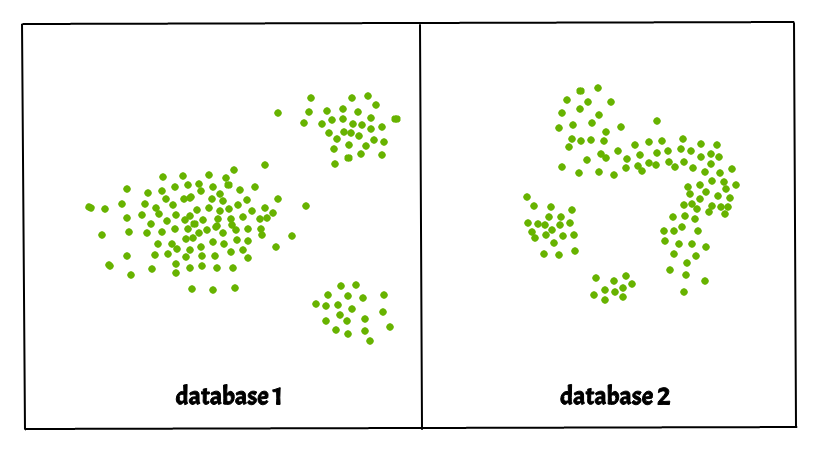

## Why DBSCAN? 
Partitioning methods (K-means) and hierarchical clustering work for finding spherical-shaped clusters or convex clusters. In other words, they are suitable only for compact and well-separated clusters. Moreover, they are also severely affected by the presence of noise and outliers in the data

Real-life data may contain irregularities, like:

* Clusters can be of arbitrary shape such as those shown in the figure below. 
* Data may contain noise.

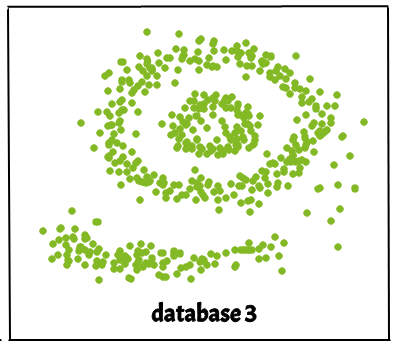

## Parameters Required For DBSCAN Algorithm
* eps: It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered neighbors. If the eps value is chosen too small then a large part of the data will be considered as an outlier. If it is chosen very large then the clusters will merge and the majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.

* MinPts: Minimum number of neighbors (data points) within eps radius. The larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.

In this algorithm, we have 3 types of data points.
* Core Point: A point is a core point if it has more than MinPts points within eps. 
* Border Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point. 
* Noise or outlier: A point which is not a core point or border point.

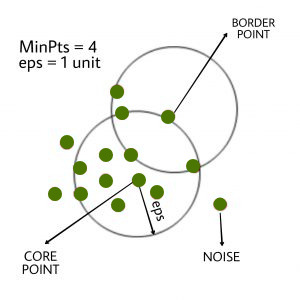

## Steps Used In DBSCAN Algorithm
* Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.
* For each core point if it is not already assigned to a cluster, create a new cluster.
* Find recursively all its density-connected points and assign them to the same cluster as the core point. 
A point a and b are said to be density connected if there exists a point c which has a sufficient number of points in its neighbors and both points a and b are within the eps distance. This is a chaining process. So, if b is a neighbor of c, c is a neighbor of d, and d is a neighbor of e, which in turn is  neighbor of a implying that b is a neighbor of a.
* Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.

## Implementation Of DBSCAN Algorithm Using Machine Learning In Python 
Here, we’ll use the Python library sklearn to compute DBSCAN. We’ll also use the matplotlib.pyplot library for visualizing clusters.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

### Prepare dataset 

We will create a dataset using sklearn for modeling. We make_blob for creating the dataset

In [3]:
# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)

### Modeling The Data Using DBSCAN 

['y', 'b', 'g', 'r']


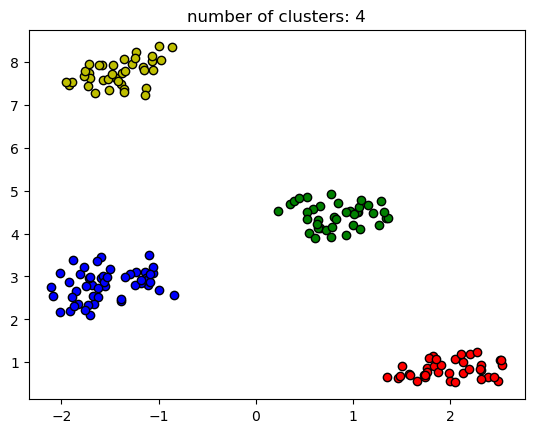

In [4]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
 
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
 
# Plot result
 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
 
    class_member_mask = (labels == k)
 
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

### Evaluation Metrics For DBSCAN Algorithm In Machine Learning 
We will use the Silhouette score and Adjusted rand score for evaluating clustering algorithms. Silhouette’s score is in the range of -1 to 1. A score near 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.

Absolute Rand Score is in the range of 0 to 1. More than 0.9 denotes excellent cluster recovery, and above 0.8 is a good recovery. Less than 0.5 is considered to be poor recovery.

In [5]:

# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.13
Adjusted Rand Index: 0.31


## When Should We Use DBSCAN Over K-Means In Clustering Analysis?
DBSCAN(Density-Based Spatial Clustering of Applications with Noise) and K-Means are both clustering algorithms that group together data that have the same characteristic. However, They work on different principles and are suitable for different types of data. We prefer to use DBSCAN when the data is not spherical in shape or the number of classes is not known beforehand.

Difference Between DBSCAN and K-Means.
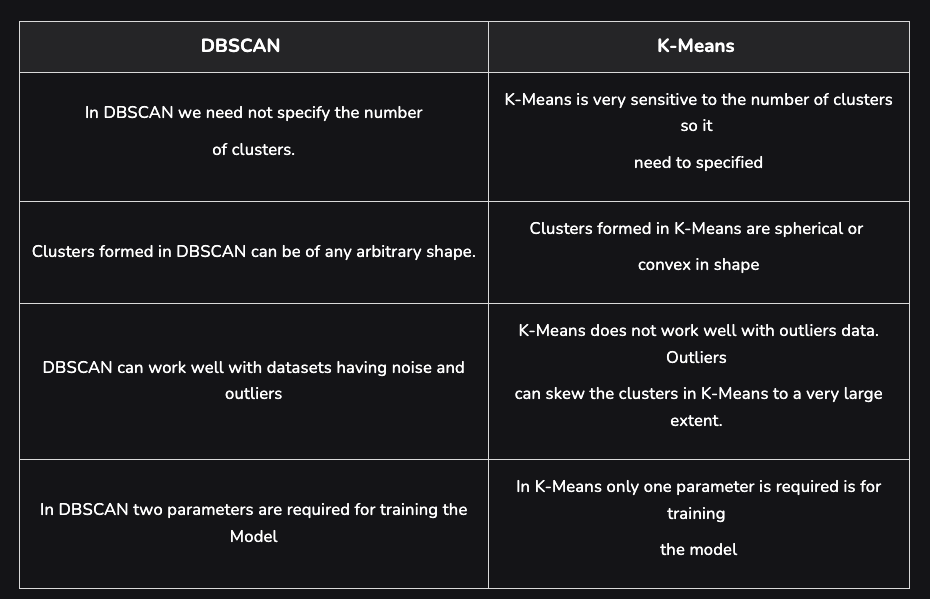

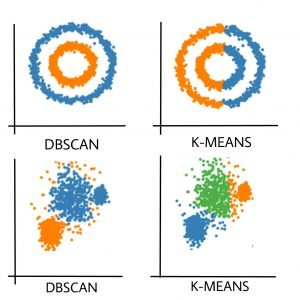

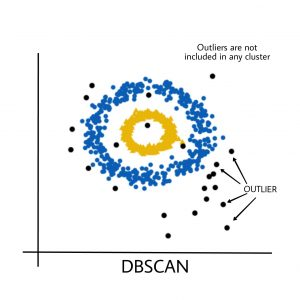

## Spectral Cluster

In [ ]:
# Standardization of the dataset before performing PCA

from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.cluster import SpectralClustering 

In [7]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/glossary/main/data/protein.csv')
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [8]:
X2 = df.iloc[:,1:10]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)

In [10]:
X_scaled_df = pd.DataFrame(X_scaled,columns=df.columns[1:10])

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(random_state=42)

In [13]:
pca.fit(X_scaled)

PCA(random_state=42)

In [14]:
from sklearn.decomposition import IncrementalPCA

In [15]:
pca_final = IncrementalPCA(n_components=2)

In [16]:
X_pca_final = pca_final.fit_transform(X_scaled)

In [17]:
X_pca_final_df=pd.DataFrame(X_pca_final,columns=['PC1','PC2'])

In [18]:
X_pca_final_df

,PC1,PC2
0,3.557238,-1.664102
1,-1.452006,-1.062702
2,-1.655480,0.162784
3,3.198708,-1.327895
4,-0.378104,-0.615096
5,-2.414042,0.291332
6,-1.451538,0.459586
7,-1.596104,-0.608293
8,-1.518666,0.801560
9,2.285884,1.021701


### Affinity matrix with Gaussian Kernel

In [19]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 
   
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_pca_final_df)

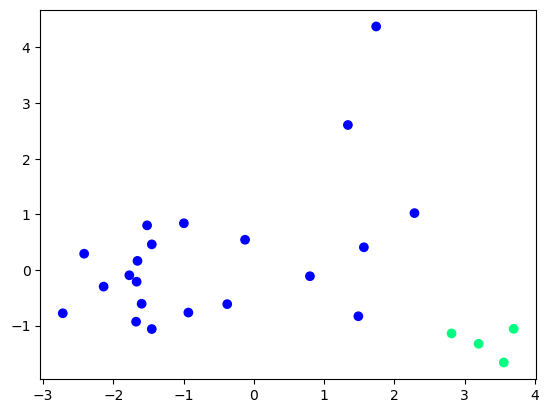

In [21]:
# Visualizing the clustering 
plt.scatter(X_pca_final_df['PC1'], X_pca_final_df['PC2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='rbf') .fit_predict(X_pca_final_df), cmap =plt.cm.winter) 
plt.show()

### Affinity matrix with Eucledean Distance

In [ ]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_pca_final_df)

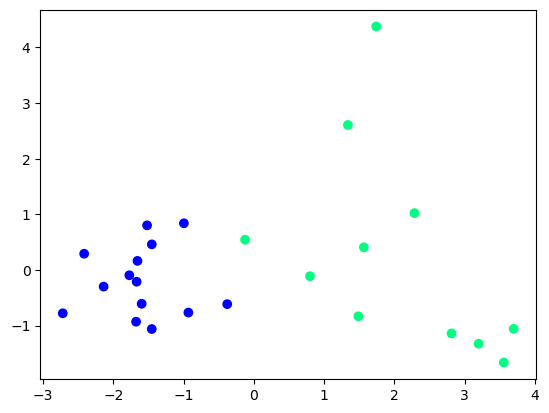

In [22]:
# Visualizing the clustering 
plt.scatter(X_pca_final_df['PC1'], X_pca_final_df['PC2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') .fit_predict(X_pca_final_df), cmap =plt.cm.winter) 
plt.show()